In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage
from loguru import logger



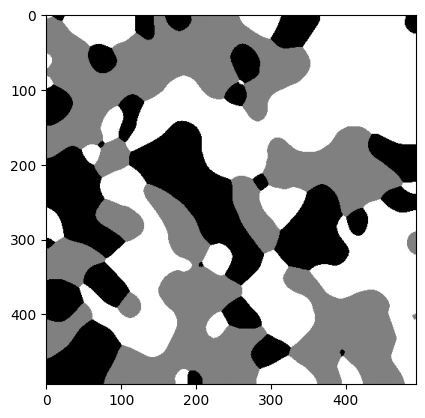

[  0 128 255]
Image type is uint8


In [2]:
# load the image 
image = skimage.io.imread('data/fuel_cells/fuel_cell_3.tif')

# display the image
plt.imshow(image, cmap='gray')
plt.show()

# find the unique values in the image
unique_values = np.unique(image)
print(unique_values)

print(f"Image type is {image.dtype}")


In [3]:
# create a copy of the image
image_copy = image.copy()
print("Original image values:", np.unique(image_copy))

Original image values: [  0 128 255]


In [4]:
# Map the pixel intensities into values 0, 1, 2
mapped_image = np.zeros_like(image_copy)
mapped_image[image_copy == 0] = 0
mapped_image[image_copy == 128] = 1
mapped_image[image_copy == 255] = 2
print("After mapping, values:", np.unique(mapped_image))

After mapping, values: [0 1 2]


Row differences: (array([0, 1, 2], dtype=int32), array([239561,   2913,   1068]))
Column differences: (array([0, 1, 2], dtype=int32), array([239439,   2963,   1140]))


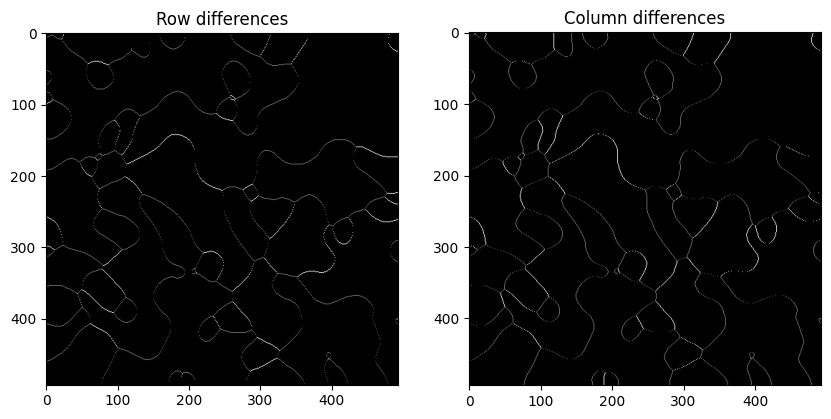

In [14]:
# convert to int32 to avoid overflow of the unit8
mapped_image = mapped_image.astype(np.int32)
# unit 8 values are from 0 to 255
# so when we do 1 - 2 we get 255 instead of -1 as the unit 8 wraps around

# calculate the row and column differences
row_diff = np.abs(mapped_image[1:] - mapped_image[:-1])
print("Row differences:", np.unique(row_diff, return_counts=True))

col_diff = np.abs(mapped_image[:,:-1] - mapped_image[:,1:])
print("Column differences:", np.unique(col_diff, return_counts=True))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(row_diff, cmap='gray')
ax[0].set_title("Row differences")
ax[1].imshow(col_diff, cmap='gray')
ax[1].set_title("Column differences")
plt.show()


In [6]:
count_of_row_diff = np.unique(row_diff, return_counts=True)

# indexes above 0 
indexes = count_of_row_diff[0] > 0
print("Indexes above 0:", indexes)
count_of_row_diff = sum(count_of_row_diff[1][indexes])
print(count_of_row_diff)

Indexes above 0: [False  True  True]
3981


In [15]:
def length_of_segmentation_boundary(image):
    # create a coppy of the image 
    image_copy = image.copy()
    logger.info(f"Original image values: {np.unique(image_copy)}")

    # determine the unique values in the image
    unique_values = np.unique(image_copy)
    logger.info(f"Unique values: {unique_values}")
    for i, value in enumerate(unique_values):
        logger.info(f"Mapping {value} to {i}")
        image_copy[image_copy == value] = i
    
    logger.info(f"After mapping, values: {np.unique(image_copy)}")

    # convert to int32 to avoid overflow of the unit8
    image_copy = image_copy.astype(np.int32)

    # calculate the row and column differences
    row_diff = np.abs(image_copy[1:] - image_copy[:-1])
    logger.info(f"Row differences: {np.unique(row_diff, return_counts=True)}")
    col_diff = np.abs(image_copy[:,:-1] - image_copy[:,1:])
    logger.info(f"Column differences: {np.unique(col_diff, return_counts=True)}")

    count_of_row_diff = np.unique(row_diff, return_counts=True)
    indexes = count_of_row_diff[0] > 0
    count_of_row_diff = sum(count_of_row_diff[1][indexes])
    logger.info(f"Count of row differences: {count_of_row_diff}")

    count_of_col_diff = np.unique(col_diff, return_counts=True)
    indexes = count_of_col_diff[0] > 0
    count_of_col_diff = sum(count_of_col_diff[1][indexes])
    logger.info(f"Count of column differences: {count_of_col_diff}")

    logger.info(f"Total length of segmentation boundary: {count_of_row_diff + count_of_col_diff}")
    

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(row_diff, cmap='gray')
    ax[0].set_title("Row differences")
    ax[1].imshow(col_diff, cmap='gray')
    ax[1].set_title("Column differences")
    plt.show()
    

2025-01-29 10:30:40.942 | INFO     | __main__:length_of_segmentation_boundary:4 - Original image values: [  0 128 255]
2025-01-29 10:30:40.947 | INFO     | __main__:length_of_segmentation_boundary:8 - Unique values: [  0 128 255]
2025-01-29 10:30:40.949 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 0 to 0
2025-01-29 10:30:40.950 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 128 to 1
2025-01-29 10:30:40.952 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 255 to 2
2025-01-29 10:30:40.957 | INFO     | __main__:length_of_segmentation_boundary:13 - After mapping, values: [0 1 2]
2025-01-29 10:30:40.961 | INFO     | __main__:length_of_segmentation_boundary:20 - Row differences: (array([0, 1, 2], dtype=int32), array([239561,   2913,   1068]))
2025-01-29 10:30:40.964 | INFO     | __main__:length_of_segmentation_boundary:22 - Column differences: (array([0, 1, 2], dtype=int32), array([239439,   2963,   1140]))
2025-01-29 10:30:40.966 |

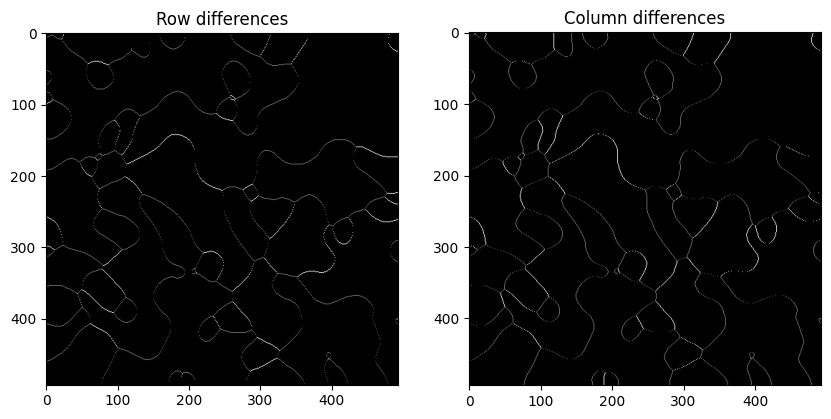

In [16]:
length_of_segmentation_boundary(image)

In [ ]:
# load the other images 

In [10]:
image_1 = skimage.io.imread('data/fuel_cells/fuel_cell_1.tif')
image_2 = skimage.io.imread('data/fuel_cells/fuel_cell_2.tif')
image_3 = skimage.io.imread('data/fuel_cells/fuel_cell_3.tif')

2025-01-29 10:30:44.118 | INFO     | __main__:length_of_segmentation_boundary:4 - Original image values: [  0 128 255]
2025-01-29 10:30:44.124 | INFO     | __main__:length_of_segmentation_boundary:8 - Unique values: [  0 128 255]
2025-01-29 10:30:44.125 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 0 to 0
2025-01-29 10:30:44.127 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 128 to 1
2025-01-29 10:30:44.129 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 255 to 2
2025-01-29 10:30:44.135 | INFO     | __main__:length_of_segmentation_boundary:13 - After mapping, values: [0 1 2]
2025-01-29 10:30:44.138 | INFO     | __main__:length_of_segmentation_boundary:20 - Row differences: (array([0, 1, 2], dtype=int32), array([235429,   5930,   2183]))
2025-01-29 10:30:44.142 | INFO     | __main__:length_of_segmentation_boundary:22 - Column differences: (array([0, 1, 2], dtype=int32), array([235327,   5812,   2403]))
2025-01-29 10:30:44.144 |

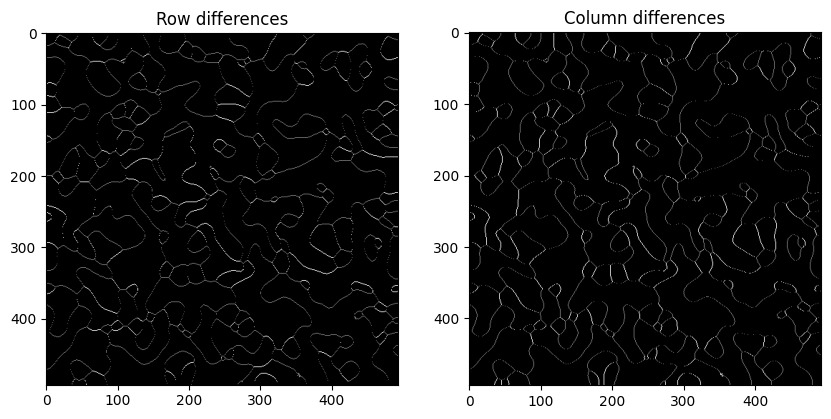

In [17]:
length_of_segmentation_boundary(image_1)

2025-01-29 10:30:44.607 | INFO     | __main__:length_of_segmentation_boundary:4 - Original image values: [  0 128 255]
2025-01-29 10:30:44.614 | INFO     | __main__:length_of_segmentation_boundary:8 - Unique values: [  0 128 255]
2025-01-29 10:30:44.615 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 0 to 0
2025-01-29 10:30:44.616 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 128 to 1
2025-01-29 10:30:44.618 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 255 to 2
2025-01-29 10:30:44.624 | INFO     | __main__:length_of_segmentation_boundary:13 - After mapping, values: [0 1 2]
2025-01-29 10:30:44.627 | INFO     | __main__:length_of_segmentation_boundary:20 - Row differences: (array([0, 1, 2], dtype=int32), array([238265,   3823,   1454]))
2025-01-29 10:30:44.630 | INFO     | __main__:length_of_segmentation_boundary:22 - Column differences: (array([0, 1, 2], dtype=int32), array([238018,   3939,   1585]))
2025-01-29 10:30:44.632 |

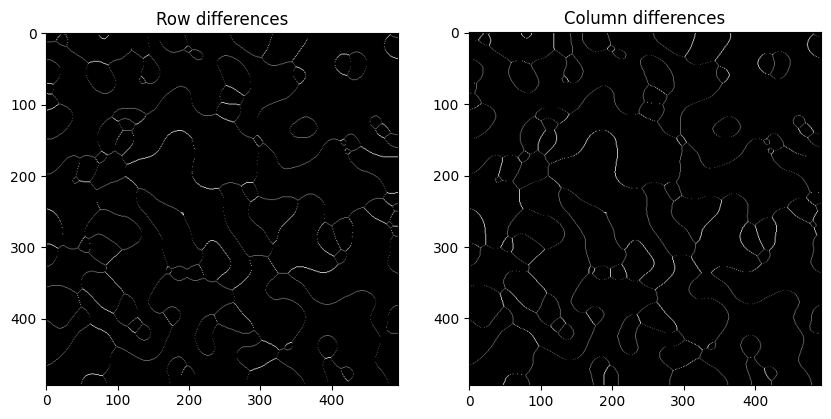

In [18]:
length_of_segmentation_boundary(image_2)

2025-01-29 10:30:45.121 | INFO     | __main__:length_of_segmentation_boundary:4 - Original image values: [  0 128 255]
2025-01-29 10:30:45.127 | INFO     | __main__:length_of_segmentation_boundary:8 - Unique values: [  0 128 255]
2025-01-29 10:30:45.128 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 0 to 0
2025-01-29 10:30:45.130 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 128 to 1
2025-01-29 10:30:45.131 | INFO     | __main__:length_of_segmentation_boundary:10 - Mapping 255 to 2
2025-01-29 10:30:45.137 | INFO     | __main__:length_of_segmentation_boundary:13 - After mapping, values: [0 1 2]
2025-01-29 10:30:45.140 | INFO     | __main__:length_of_segmentation_boundary:20 - Row differences: (array([0, 1, 2], dtype=int32), array([239561,   2913,   1068]))
2025-01-29 10:30:45.143 | INFO     | __main__:length_of_segmentation_boundary:22 - Column differences: (array([0, 1, 2], dtype=int32), array([239439,   2963,   1140]))
2025-01-29 10:30:45.145 |

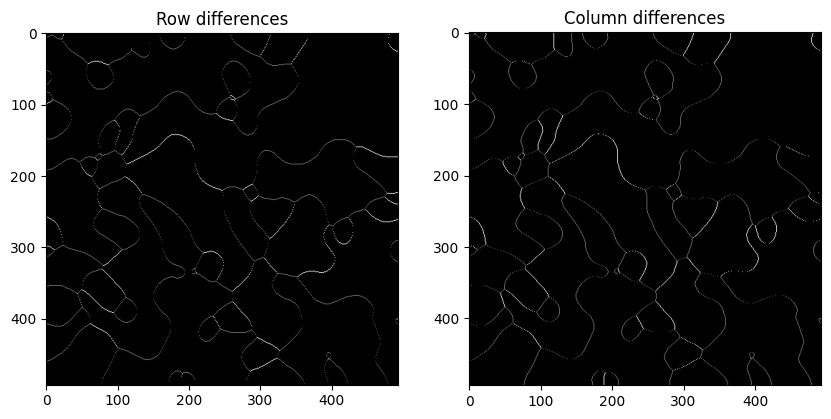

In [19]:
length_of_segmentation_boundary(image_3)